In [1]:
import os
import os.path as osp
import pickle

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from mujoco_py import const
import wrappers
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

wandb: Currently logged in as: indoril007 (use `wandb login --relogin` to force relogin)


In [7]:
EXP = 'TEST_OTHER_BRANCH_Wed_Mar_10_05:22:46_2021'
EPOCH = 1000
EPISODES = osp.join('./experiment', EXP, 'episode_logs', f'episode_{str(EPOCH)}.pkl')
ENV = osp.join('./experiment', EXP, 'env.pkl')

with open(EPISODES, 'rb') as f:
    episodes = pickle.load(f)
    
with open(ENV, 'rb') as f:
    env = pickle.load(f)

In [8]:
dir(episodes)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_asdict',
 '_field_defaults',
 '_fields',
 '_fields_defaults',
 '_make',
 '_replace',
 'actions',
 'agent_infos',
 'concatenate',
 'count',
 'env_infos',
 'env_spec',
 'from_list',
 'index',
 'last_observations',
 'lengths',
 'next_observations',
 'observations',
 'rewards',
 'split',
 'step_types',
 'to_list']

In [9]:
states = episodes.env_infos['state']
# gt_rewards = episodes.env_infos['gt_reward']
# gt_rewards = np.clip(gt_rewards, -3, None)
# scaled_gt_rewards = (gt_rewards - gt_rewards.min())
# scaled_gt_rewards /= scaled_gt_rewards.max()

In [10]:
env.reset()
positions = []
for state in states:
    env.world.sim.set_state_from_flattened(state)
    env.sim.forward()
    positions.append(env.robot_pos)

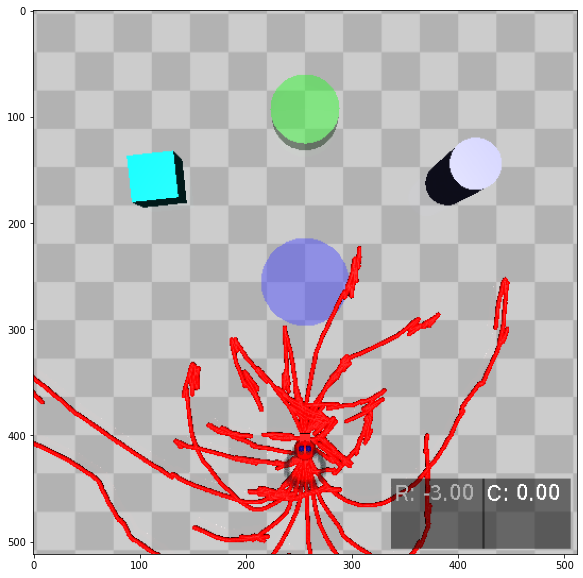

In [11]:
env.reset()
env.render('rgb_array')
for pos in positions:
    env.viewer.add_marker(pos=pos,
                          size=0.02 * np.ones(3),
                          type=const.GEOM_SPHERE,
                          rgba=np.array([1,0,0,1]),
                          label='')

render = env.render('rgb_array')
figure(figsize=(10,10))
plt.imshow(render)